# Train CNN with Face Emotion Dataset

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from util import gpusession
from model import basic_cnn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print ("Packages Loaded")

Packages Loaded


Load Face Emotion Dataset

In [2]:
loadpath = '../data/face_emotion.npz'
l = np.load(loadpath)
trainimg,trainlabel = l['trainimg'],l['trainlabel']
testimg,testlabel = l['testimg'],l['testlabel']
valimg,vallabel = l['valimg'],l['vallabel']
ntrain,ntest,nval = trainimg.shape[0],testimg.shape[0],valimg.shape[0]
X,Y,imgcnt,labels,xshp=l['X'],l['Y'],l['imgcnt'],l['labels'],l['rszshape']
nclass = Y.shape[1]
print ("[%d] images with xshape:[%s] and nclass:[%d]"%(X.shape[0],xshp,nclass))
print ("#Train:[%d] #Test[%d] #Validation[%d]"%(ntrain,ntest,nval))

[35886] images with xshape:[[64 64]] and nclass:[7]
#Train:[25120] #Test[7177] #Validation[3589]


Instantiate CNN

In [3]:
sess = gpusession()
C = basic_cnn(_name='Basic CNN for Face Emotions',_xtrain=trainimg,_ytrain=trainlabel,
             _xtest=testimg,_ytest=testlabel,_xval=valimg,_yval=vallabel,
             _xshp=xshp,_nclass=nclass,_labels=labels,_sess=sess,
             _batch_size=64,_lr=1e-3)

[Basic CNN for Face Emotions] Instantiated
 Input size:[[64 64]] #class:[7]
Trainable Variables
 [0] Name:[W/conv1/weights:0] Shape:[[3, 3, 1, 64]]
 [1] Name:[W/conv1/BatchNorm/beta:0] Shape:[[64]]
 [2] Name:[W/conv2/weights:0] Shape:[[3, 3, 64, 128]]
 [3] Name:[W/conv2/BatchNorm/beta:0] Shape:[[128]]
 [4] Name:[W/conv3/weights:0] Shape:[[3, 3, 128, 256]]
 [5] Name:[W/conv3/BatchNorm/beta:0] Shape:[[256]]
 [6] Name:[W/fc3/weights:0] Shape:[[16384, 1024]]
 [7] Name:[W/fc3/BatchNorm/beta:0] Shape:[[1024]]
 [8] Name:[W/out5/weights:0] Shape:[[1024, 7]]
 [9] Name:[W/out5/biases:0] Shape:[[7]]
Global Variables
 [0] Name:[W/conv1/weights:0] Shape:[[3, 3, 1, 64]]
 [1] Name:[W/conv1/BatchNorm/beta:0] Shape:[[64]]
 [2] Name:[W/conv1/BatchNorm/moving_mean:0] Shape:[[64]]
 [3] Name:[W/conv1/BatchNorm/moving_variance:0] Shape:[[64]]
 [4] Name:[W/conv2/weights:0] Shape:[[3, 3, 64, 128]]
 [5] Name:[W/conv2/BatchNorm/beta:0] Shape:[[128]]
 [6] Name:[W/conv2/BatchNorm/moving_mean:0] Shape:[[128]]
 [7]

Update

[iter:0000]TrainLoss:[1.95e+00],TrainAccr:[11.01%],TestAccr:[11.09%]


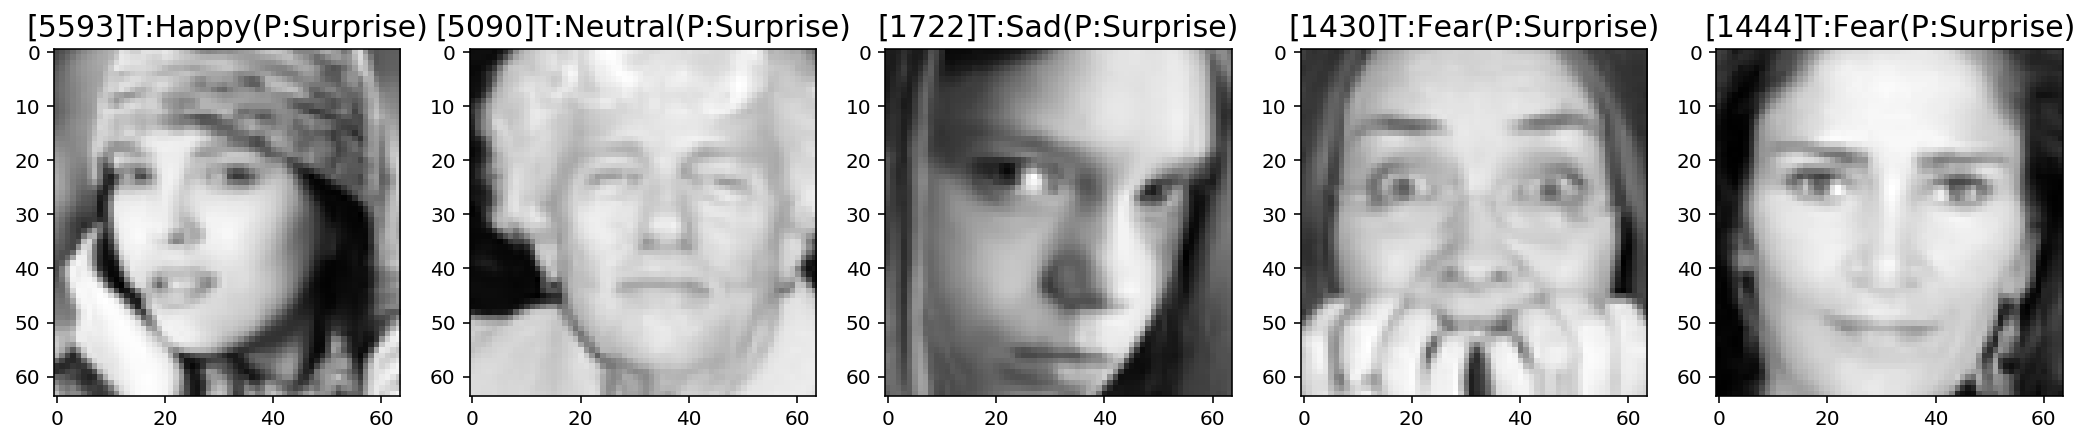

[iter:0500]TrainLoss:[1.26e+00],TrainAccr:[52.34%],TestAccr:[48.89%]
[iter:1000]TrainLoss:[1.20e+00],TrainAccr:[55.71%],TestAccr:[48.04%]


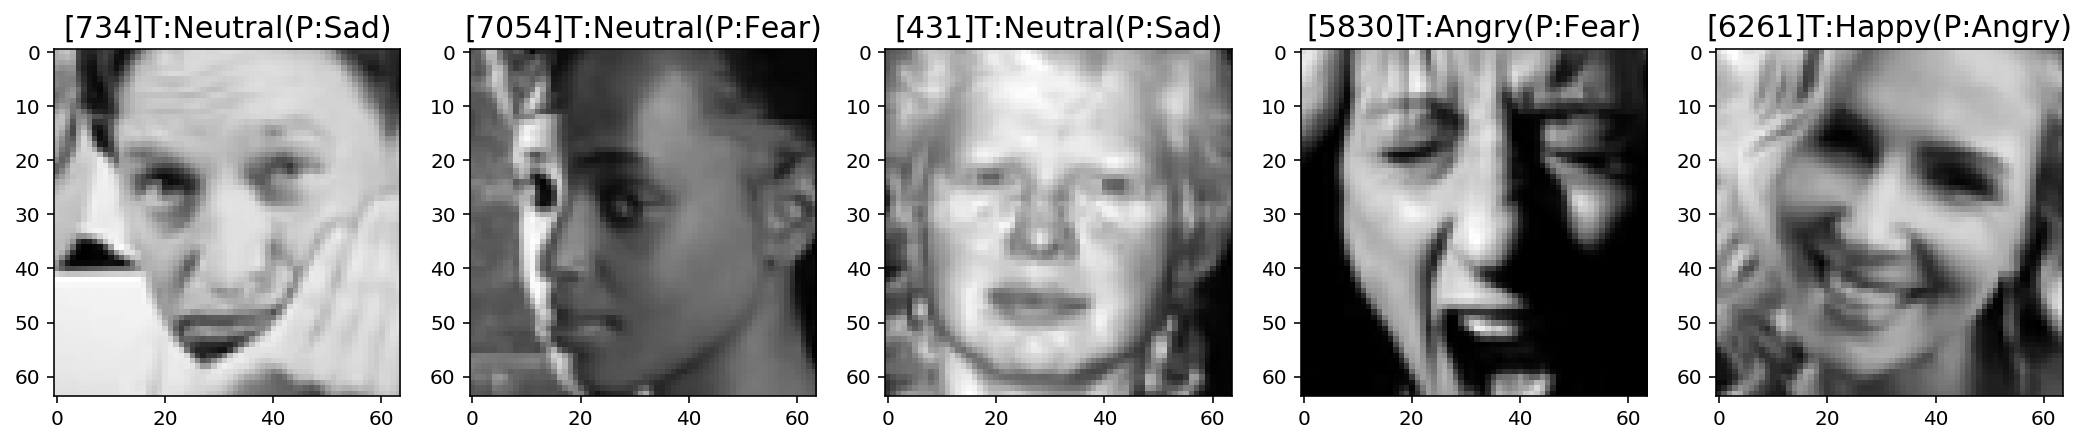

[iter:1500]TrainLoss:[6.78e-01],TrainAccr:[76.07%],TestAccr:[60.79%]
[iter:2000]TrainLoss:[7.65e-01],TrainAccr:[71.25%],TestAccr:[55.18%]


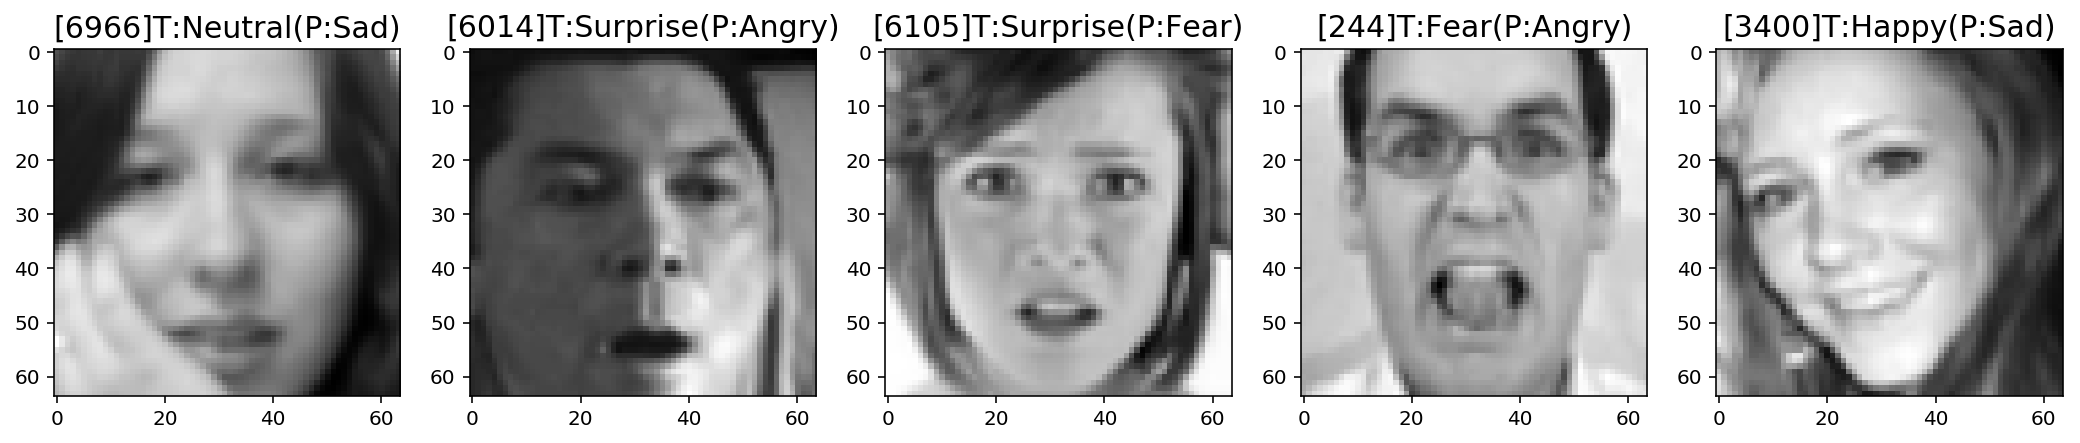

[iter:2500]TrainLoss:[2.30e-01],TrainAccr:[92.75%],TestAccr:[71.90%]
[iter:3000]TrainLoss:[1.06e-01],TrainAccr:[96.91%],TestAccr:[75.00%]


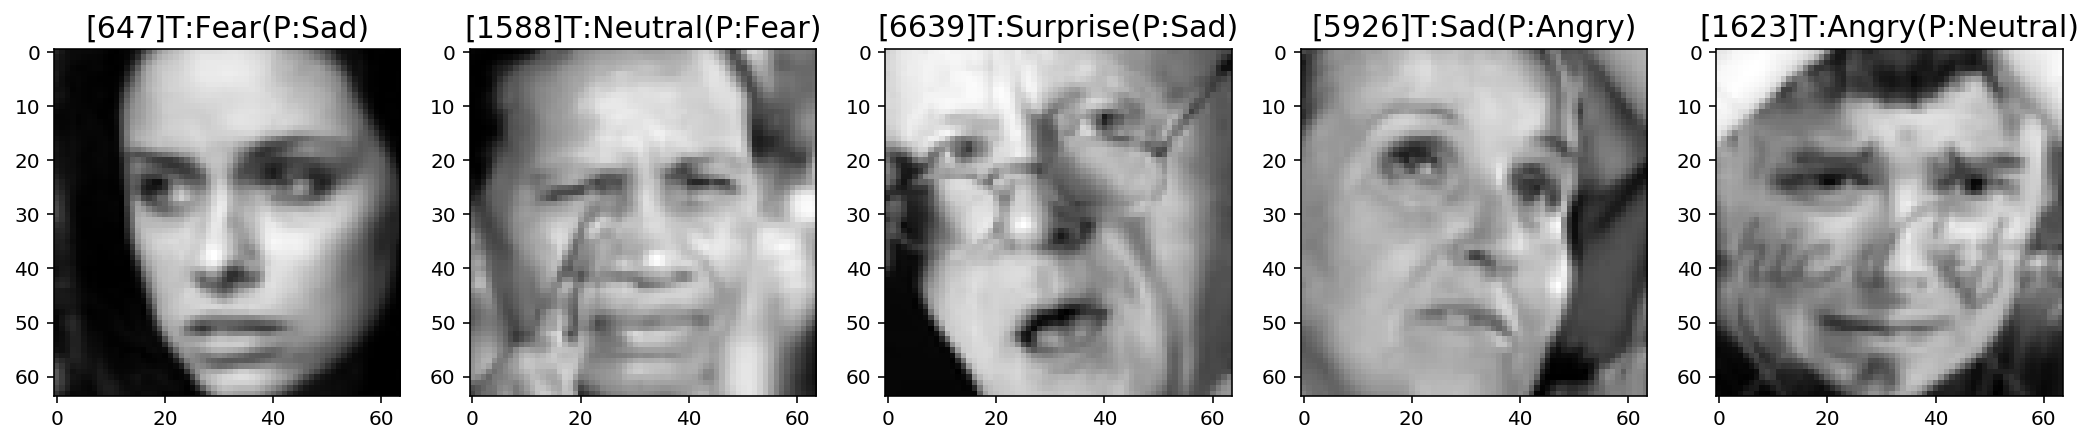

[iter:3500]TrainLoss:[9.63e-02],TrainAccr:[97.17%],TestAccr:[75.88%]
[iter:4000]TrainLoss:[5.33e-02],TrainAccr:[98.72%],TestAccr:[76.49%]


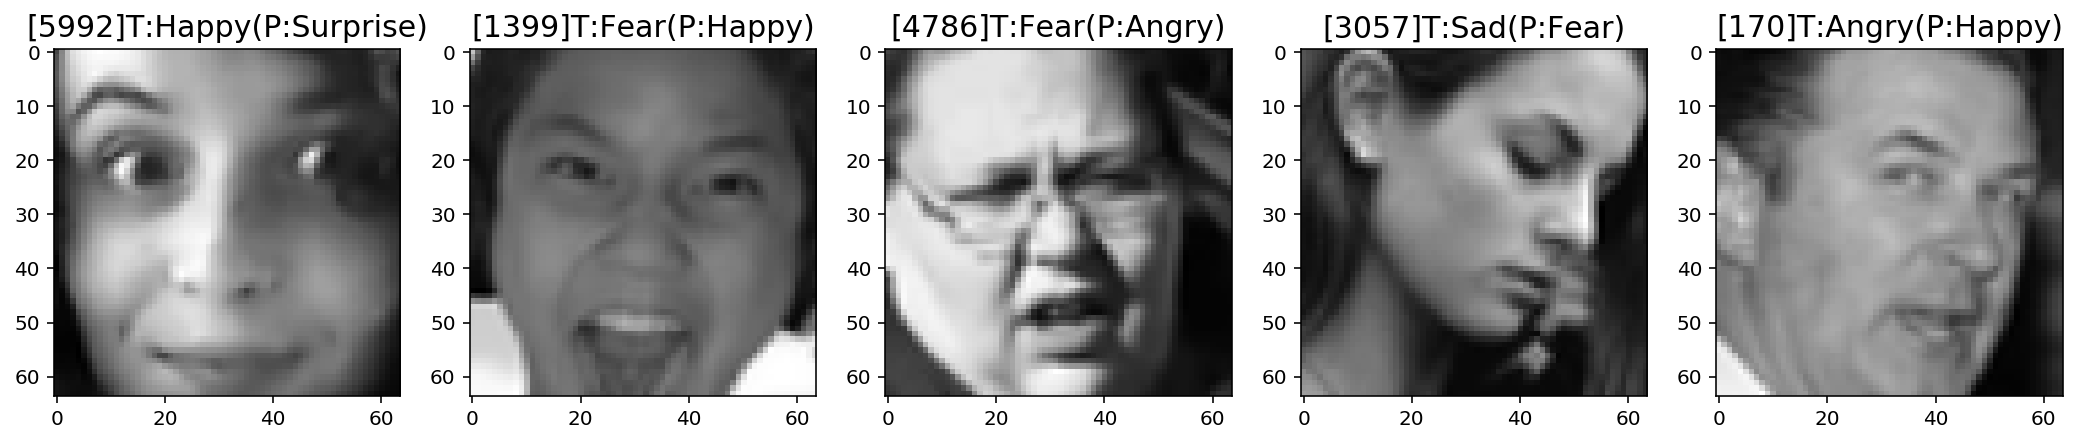

[iter:4500]TrainLoss:[5.56e-02],TrainAccr:[98.69%],TestAccr:[76.13%]
[iter:4999]TrainLoss:[7.72e-02],TrainAccr:[97.99%],TestAccr:[75.09%]
Done


In [4]:
C.init_weight()
maxiter = 5000
for iter in range(maxiter):
    """ Update """
    C.update()
    """ Print status """
    if (iter%(int)(maxiter/10))==0: C.print_status()
    """ Plot misclassified images"""
    if (iter%(int)(maxiter/5))==0: C.plot_misclassified()
C.print_status()
print ("Done")

Save

In [5]:
C.save(_savename='net/net_cnn.npz')

[net/net_cnn.npz] Saved. Size is [68.6]MB


Restore and Check

In [6]:
C.init_weight()
C.print_status()

[iter:0000]TrainLoss:[1.95e+00],TrainAccr:[11.10%],TestAccr:[11.72%]


In [7]:
C.restore(_loadname='net/net_cnn.npz')
C.print_status()

Weight restored from [net/net_cnn.npz]
[iter:0000]TrainLoss:[7.72e-02],TrainAccr:[97.99%],TestAccr:[75.09%]
